In [1]:
%matplotlib inline

import suPAErnova as snpae
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Some useful paths to have access to
cwd = Path.cwd()
examples_dir = cwd.parent.parent
data_dir = examples_dir / "suPAErnova_data" # Put your data into this directory

2025-03-10 16:16:11.189721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 16:16:11.191092: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-10 16:16:11.196580: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-10 16:16:11.213695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741583771.241534   46152 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741583771.24

# Global Configuration

In [2]:
verbose = False # Increase log verbosity
force = False # Don't rerun steps if not necessary

cfg = snpae.setup_global_config({}, verbose=verbose, force=force) # Just pass an empty dictionary to initialise

Logging to /home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook/output/supaernova.log


# Data Configuration
If we just tried to run `DATA` without providing the required options, then `SuPAErnova` will fail, providing a (hopefully) useful description of what's missing.

In [3]:
cfg["DATA"] = {}
data = snpae.steps.Data(cfg)

DATA is missing required option: DATA_DIR: Path to directory containing data.
    Can be absolute or relative to the base path.


ValueError: Invalid DATA configuration

Let's instead actually provide proper configuration options

In [4]:
# Note that these keys *MUST* be captilalised. This is not the case when using a `suPAErnova.toml` config file.
data_cfg = {
    # === Required Keys ===

    # Path to directory containing data.
    #   Can be absolute or relative to the base path.
    "DATA_DIR": str(data_dir), # Needs to be a string so that SuPAErnova can validate it
    
    # Metadata CSV containing SN names and SALT fit parameters.
    #   Can be absolute or relative to the data path.
    "META": "meta.csv",

    # TXT file containing additional SALT fit parameters.
    #   Can be absolute or relative to the data path.
    "IDR": "IDR_eTmax.txt",

    # TXT file containing a mask of bad spectra / wavelength ranges.
    #   Can be absolute or relative to the data path.
    "MASK": "mask_info_wmin_wmax.txt",

    # === Optional Keys ===

    # Which assumed cosmology to use when running SALT models.
    #   Available cosmological can be found [here](https://docs.astropy.org/en/stable/cosmology/realizations.html)
    #   Defaults to WMAP7
    "COSMOLOGICAL_MODEL": "WMAP7",

    # The absolute path to an existing SALT2/3 model, or the name of an existing SNCosmo SALT2/3 model.
    #   Defaults to salt3
    "SALT_MODEL": "salt3",

    # Minimum phase for spectral data, relative to peak. Spectral data earlier than this phase will be cut.
    #   Defaults to -10.0
    "MIN_PHASE": -10,

    # Maximum phase for spectral data, relative to peak. Spectral data later than this phase will be cut.
    #   Defaults to 40.0
    "MAX_PHASE": 40,

    # The fraction of data to be used for training, with the rest of the data going to testing and validation.
    #   Defaults to 0.75
    "TRAIN_FRAC": 0.75,

    # The seed used throughout data preperation, in particular for randomly splitting the data into training, testing, and validation bins.
    #   Defaults to 12345
    "SEED": 12345,

    # === Analysis Keys ===
    "ANALYSIS": {
        # Which spectra to plot
        #    str: The name of a single spectrum to plot
        #    list[str]: Names of each spectrum to plot
        #    True: Plot every spectrum
        "PLOT_SPECTRA": True
    }
}

cfg["DATA"] = data_cfg
data = snpae.steps.Data(cfg)
print(data)

DATA:
    Is Setup: False
    Has Run: False
    Global Config: {'VERBOSE': False, 'FORCE': False, 'BASE': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook'), 'OUTPUT': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook/output'), 'RESULTS': {}, 'LOG': <module 'suPAErnova.utils.suPAErnova_logging' from '/home/patricka/PARA/Projects/suPAErnova/src/suPAErnova/utils/suPAErnova_logging.py'>}
    DATA Options: {'DATA_DIR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data'), 'META': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/meta.csv'), 'IDR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/IDR_eTmax.txt'), 'MASK': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/mask_info_wmin_wmax.txt'), 'COSMOLOGICAL_MODEL': FlatLambdaCDM(name='WMAP7', H0=<Quantity 70.4 km / (Mpc s)>, Om0=0.272, Tcmb0=<Quantity 2.725 K>, Neff=3.04

# Setup
We can now run the first stage of the `DATA` step, setup. Most `SuPAErnova` functions return an object called a `RequirementReturn[T]`, which is a two-tuple whose first element is `True` if the function ran successfully, and `False` otherwise. The second element is either the result of that function (of type `T`), or a `str` describing why the function failed.

In [5]:
success, result = data.setup()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error running setup: {result}")
print(data)

Setting up DATA


DATA:
    Is Setup: True
    Has Run: False
    Global Config: {'VERBOSE': False, 'FORCE': False, 'BASE': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook'), 'OUTPUT': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook/output'), 'RESULTS': {}, 'LOG': <module 'suPAErnova.utils.suPAErnova_logging' from '/home/patricka/PARA/Projects/suPAErnova/src/suPAErnova/utils/suPAErnova_logging.py'>}
    DATA Options: {'DATA_DIR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data'), 'META': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/meta.csv'), 'IDR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/IDR_eTmax.txt'), 'MASK': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/mask_info_wmin_wmax.txt'), 'COSMOLOGICAL_MODEL': FlatLambdaCDM(name='WMAP7', H0=<Quantity 70.4 km / (Mpc s)>, Om0=0.272, Tcmb0=<Quantity 2.725 K>, Neff=3.04,

# Run
Now we can run the `DATA` step, loading in the data, transforming it into something useful, and splitting the data into training and tesing subsamples.

In [6]:
success, result = data.run()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error running: {result}")
print(data)

Running DATA


DATA:
    Is Setup: True
    Has Run: True
    Global Config: {'VERBOSE': False, 'FORCE': False, 'BASE': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook'), 'OUTPUT': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook/output'), 'RESULTS': {}, 'LOG': <module 'suPAErnova.utils.suPAErnova_logging' from '/home/patricka/PARA/Projects/suPAErnova/src/suPAErnova/utils/suPAErnova_logging.py'>}
    DATA Options: {'DATA_DIR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data'), 'META': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/meta.csv'), 'IDR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/IDR_eTmax.txt'), 'MASK': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/mask_info_wmin_wmax.txt'), 'COSMOLOGICAL_MODEL': FlatLambdaCDM(name='WMAP7', H0=<Quantity 70.4 km / (Mpc s)>, Om0=0.272, Tcmb0=<Quantity 2.725 K>, Neff=3.04, 

# Result
Finally, we run the `DATA` result function, to save the results of the run function to the output directory.

In [7]:
success, result = data.result()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error saving results: {result}")
print(data)

Storing DATA results
Finished running DATA


DATA:
    Is Setup: True
    Has Run: True
    Global Config: {'VERBOSE': False, 'FORCE': False, 'BASE': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook'), 'OUTPUT': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/prepare_data/notebook/output'), 'RESULTS': {'DATA': <suPAErnova.steps.data.Data object at 0x79132f4db620>}, 'LOG': <module 'suPAErnova.utils.suPAErnova_logging' from '/home/patricka/PARA/Projects/suPAErnova/src/suPAErnova/utils/suPAErnova_logging.py'>}
    DATA Options: {'DATA_DIR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data'), 'META': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/meta.csv'), 'IDR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/IDR_eTmax.txt'), 'MASK': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/mask_info_wmin_wmax.txt'), 'COSMOLOGICAL_MODEL': FlatLambdaCDM(name='WMAP7', H0=<Quantity 70.4 km

# Analysis
Though you can obviously write your own plotting and analysis functions, `SuPAErnova` provides a number of pre-made analysis functions you can use. If defined in your `data_cfg` dictionary, thesis analysis functions can be called via the `analyse` function.

Analysing DATA
Plotting Spectra


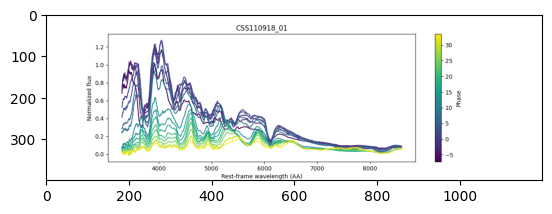

In [8]:
success, result = data.analyse()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error analysing: {result}")

img = mpimg.imread(data.plotpath / "CSS110918_01.png")
imgplot = plt.imshow(img)
plt.show()